# Pandas의 시각화 기능

사실 Pandas의 시리즈나 데이터프레임은 `plot`이라는 시각화 메서드를 내장하고 있다. `plot`은 matplotlib를 내부적으로 임포트하여 사용한다. 자세한 내용은 다음 Pandas 문서를 참조한다.

* https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [1]:
np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2018', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df1.tail()

,A,B,C
2018-04-06,9.396256,6.282026,-11.198087
2018-04-07,10.086074,7.583872,-11.826175
2018-04-08,9.605047,9.887789,-12.886190
2018-04-09,9.469097,11.024680,-12.788465
2018-04-10,10.052051,10.625231,-12.418409


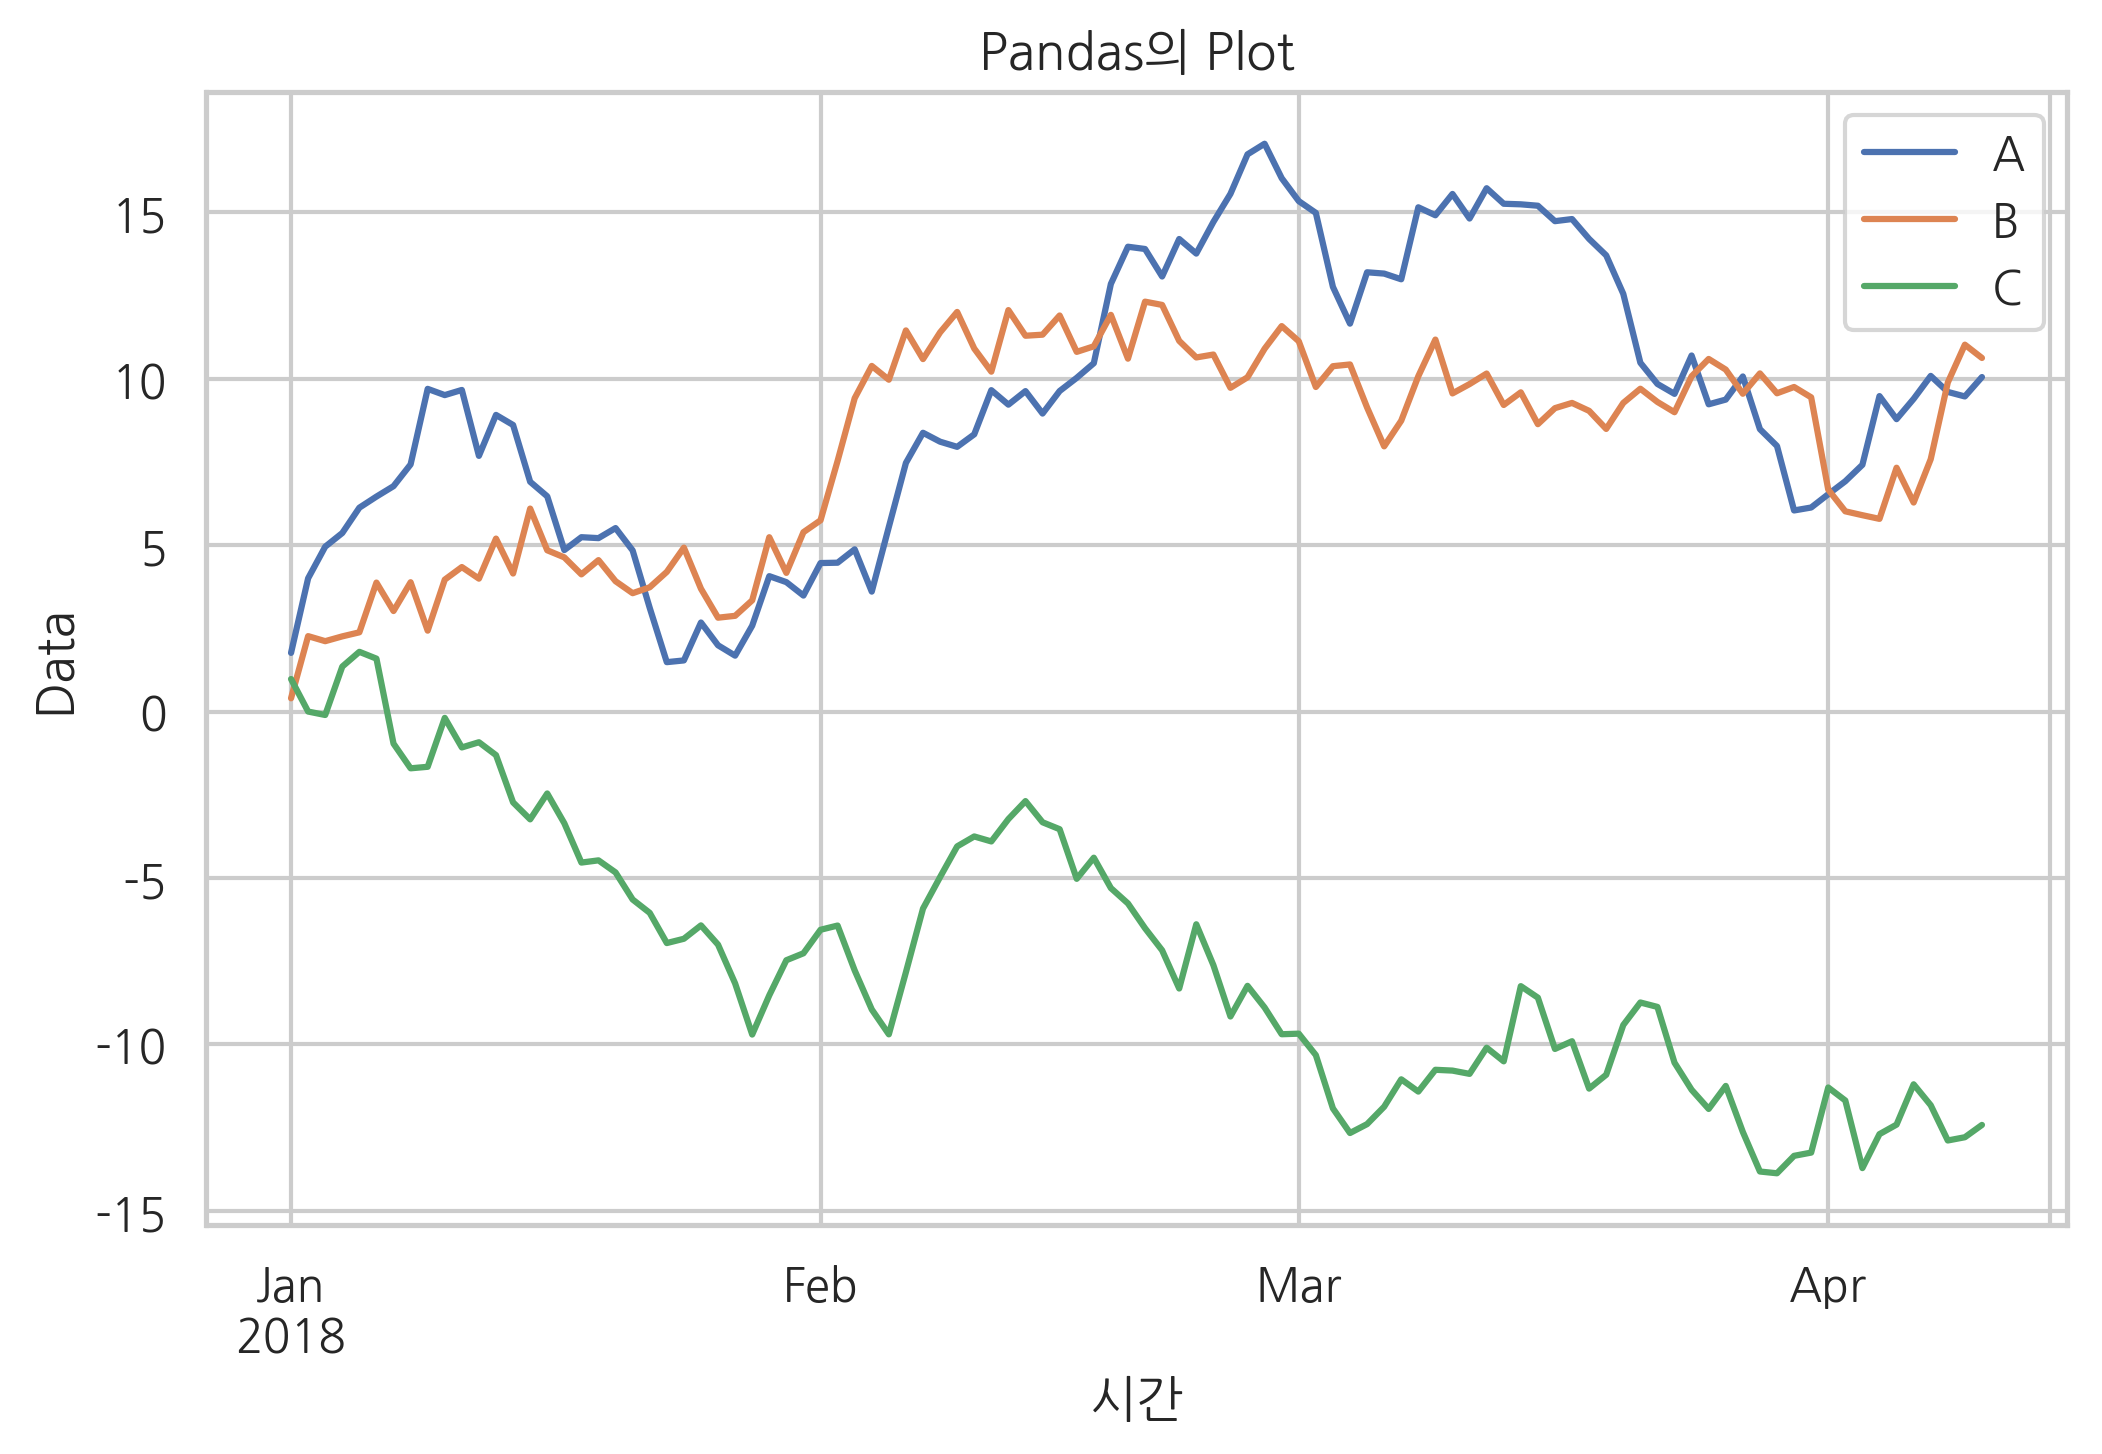

In [2]:
df1.plot()
plt.title("Pandas의 Plot")
plt.xlabel("시간")
plt.ylabel("Data")
plt.show()

`plot` 메서드의 `kind`라는 인수를 바꾸면 여러가지 플롯을 그릴 수 있다. 다음과 같은 인수값을 지원한다.

* `bar`
* `pie`
* `hist`
* `kde`
* `box`
* `scatter`
* `area`


In [3]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터

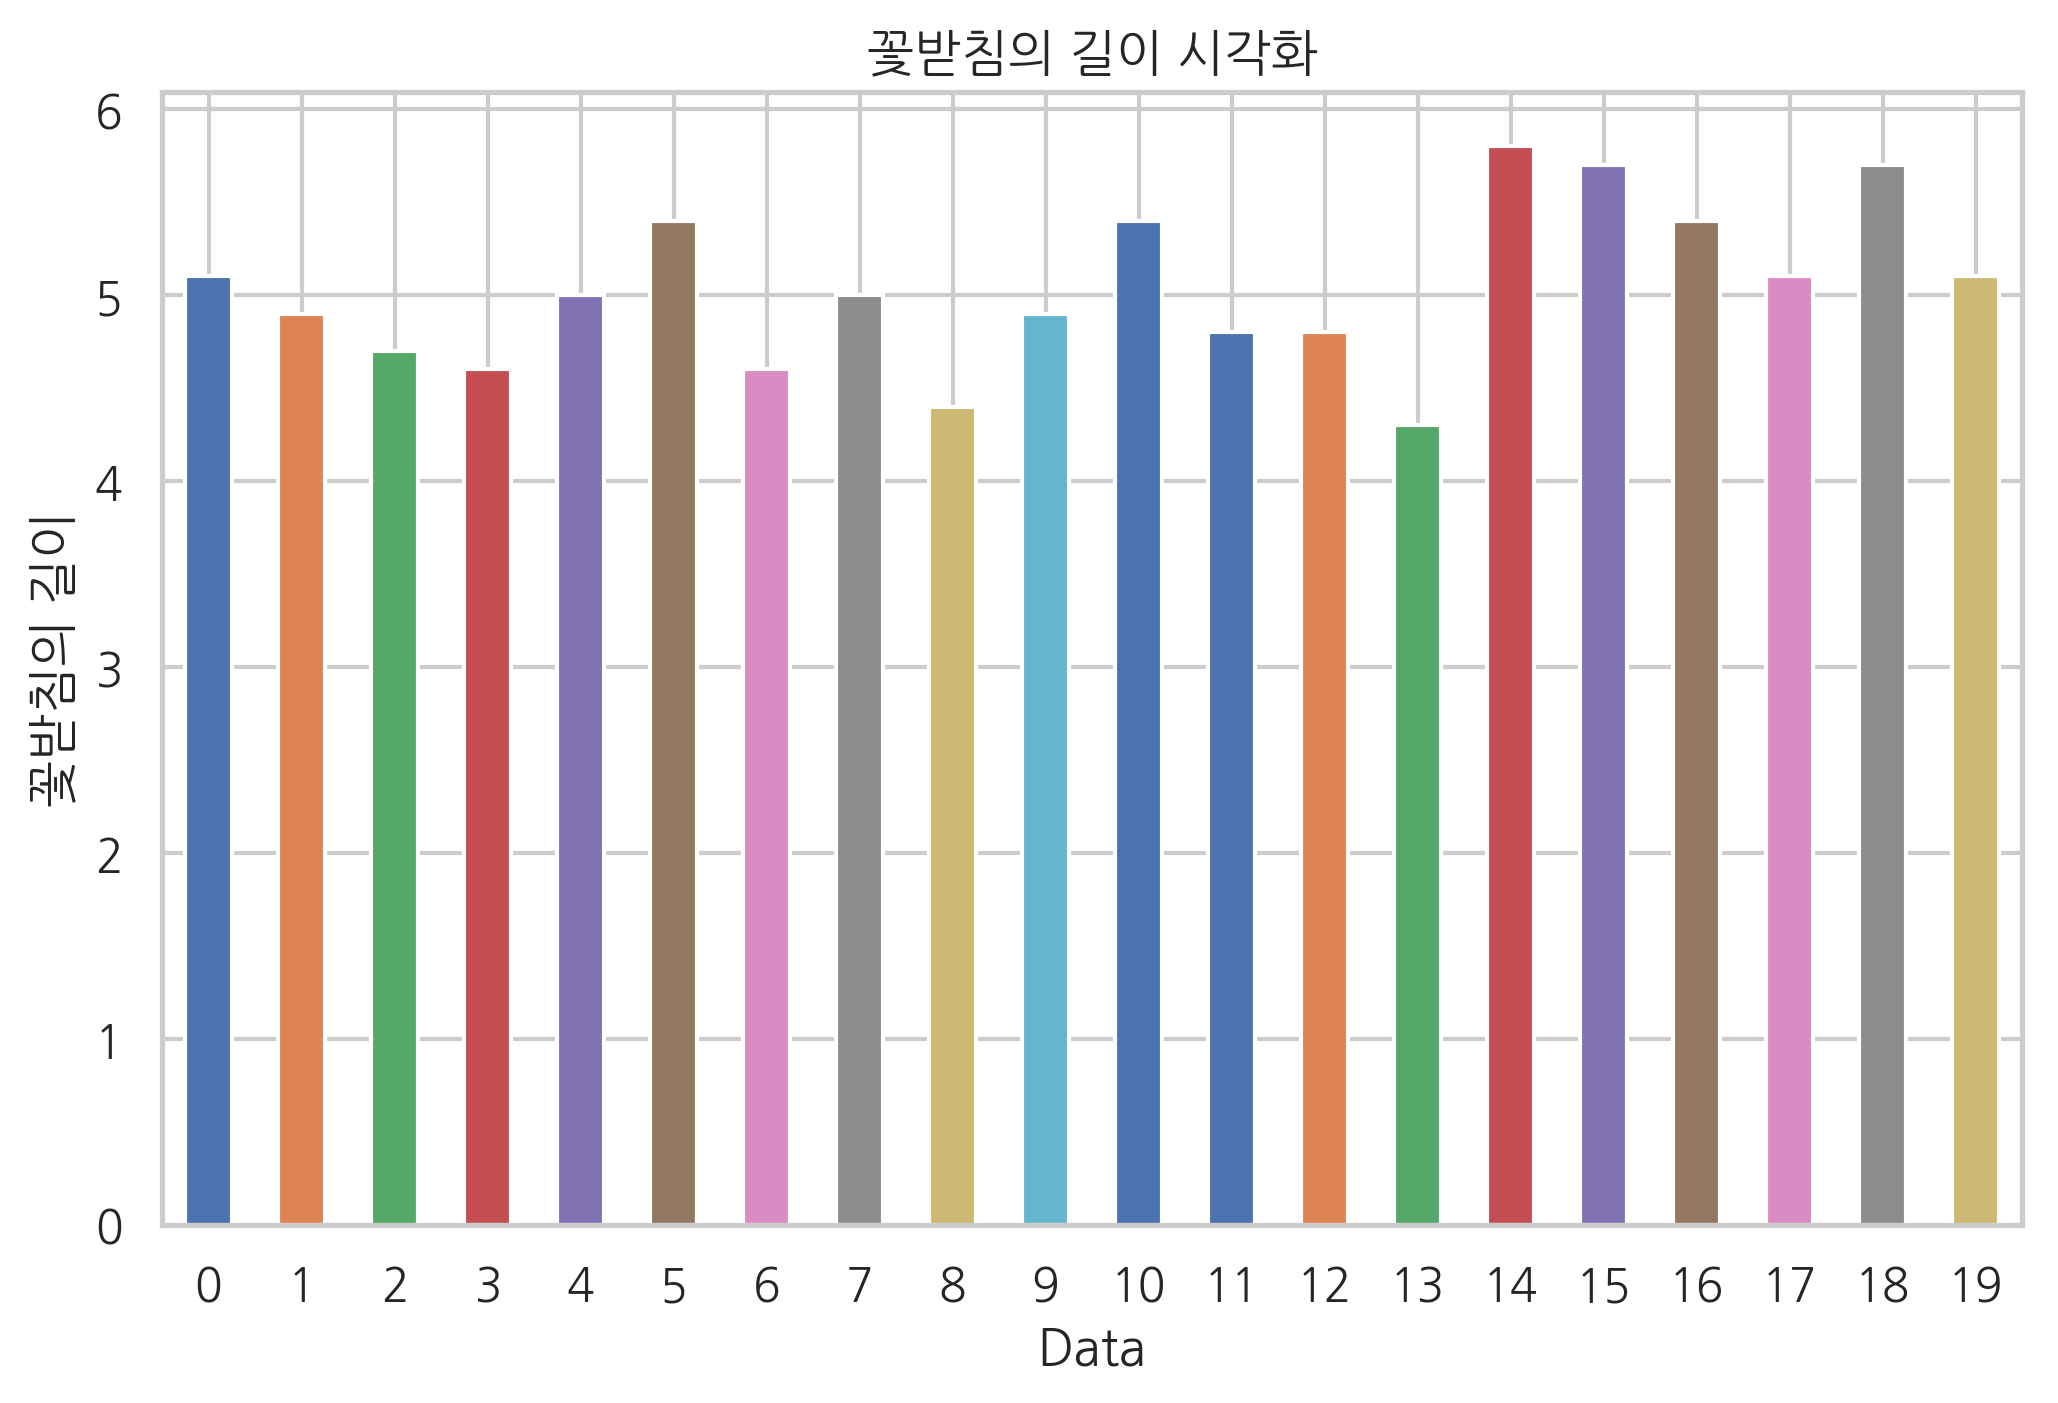

In [4]:
iris.sepal_length[:20].plot(kind='bar', rot=0)
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.show()

`kind` 인수에 문자열을 쓰는 대신 `plot.bar`처럼 직접 메서드로 사용할 수도 있다.

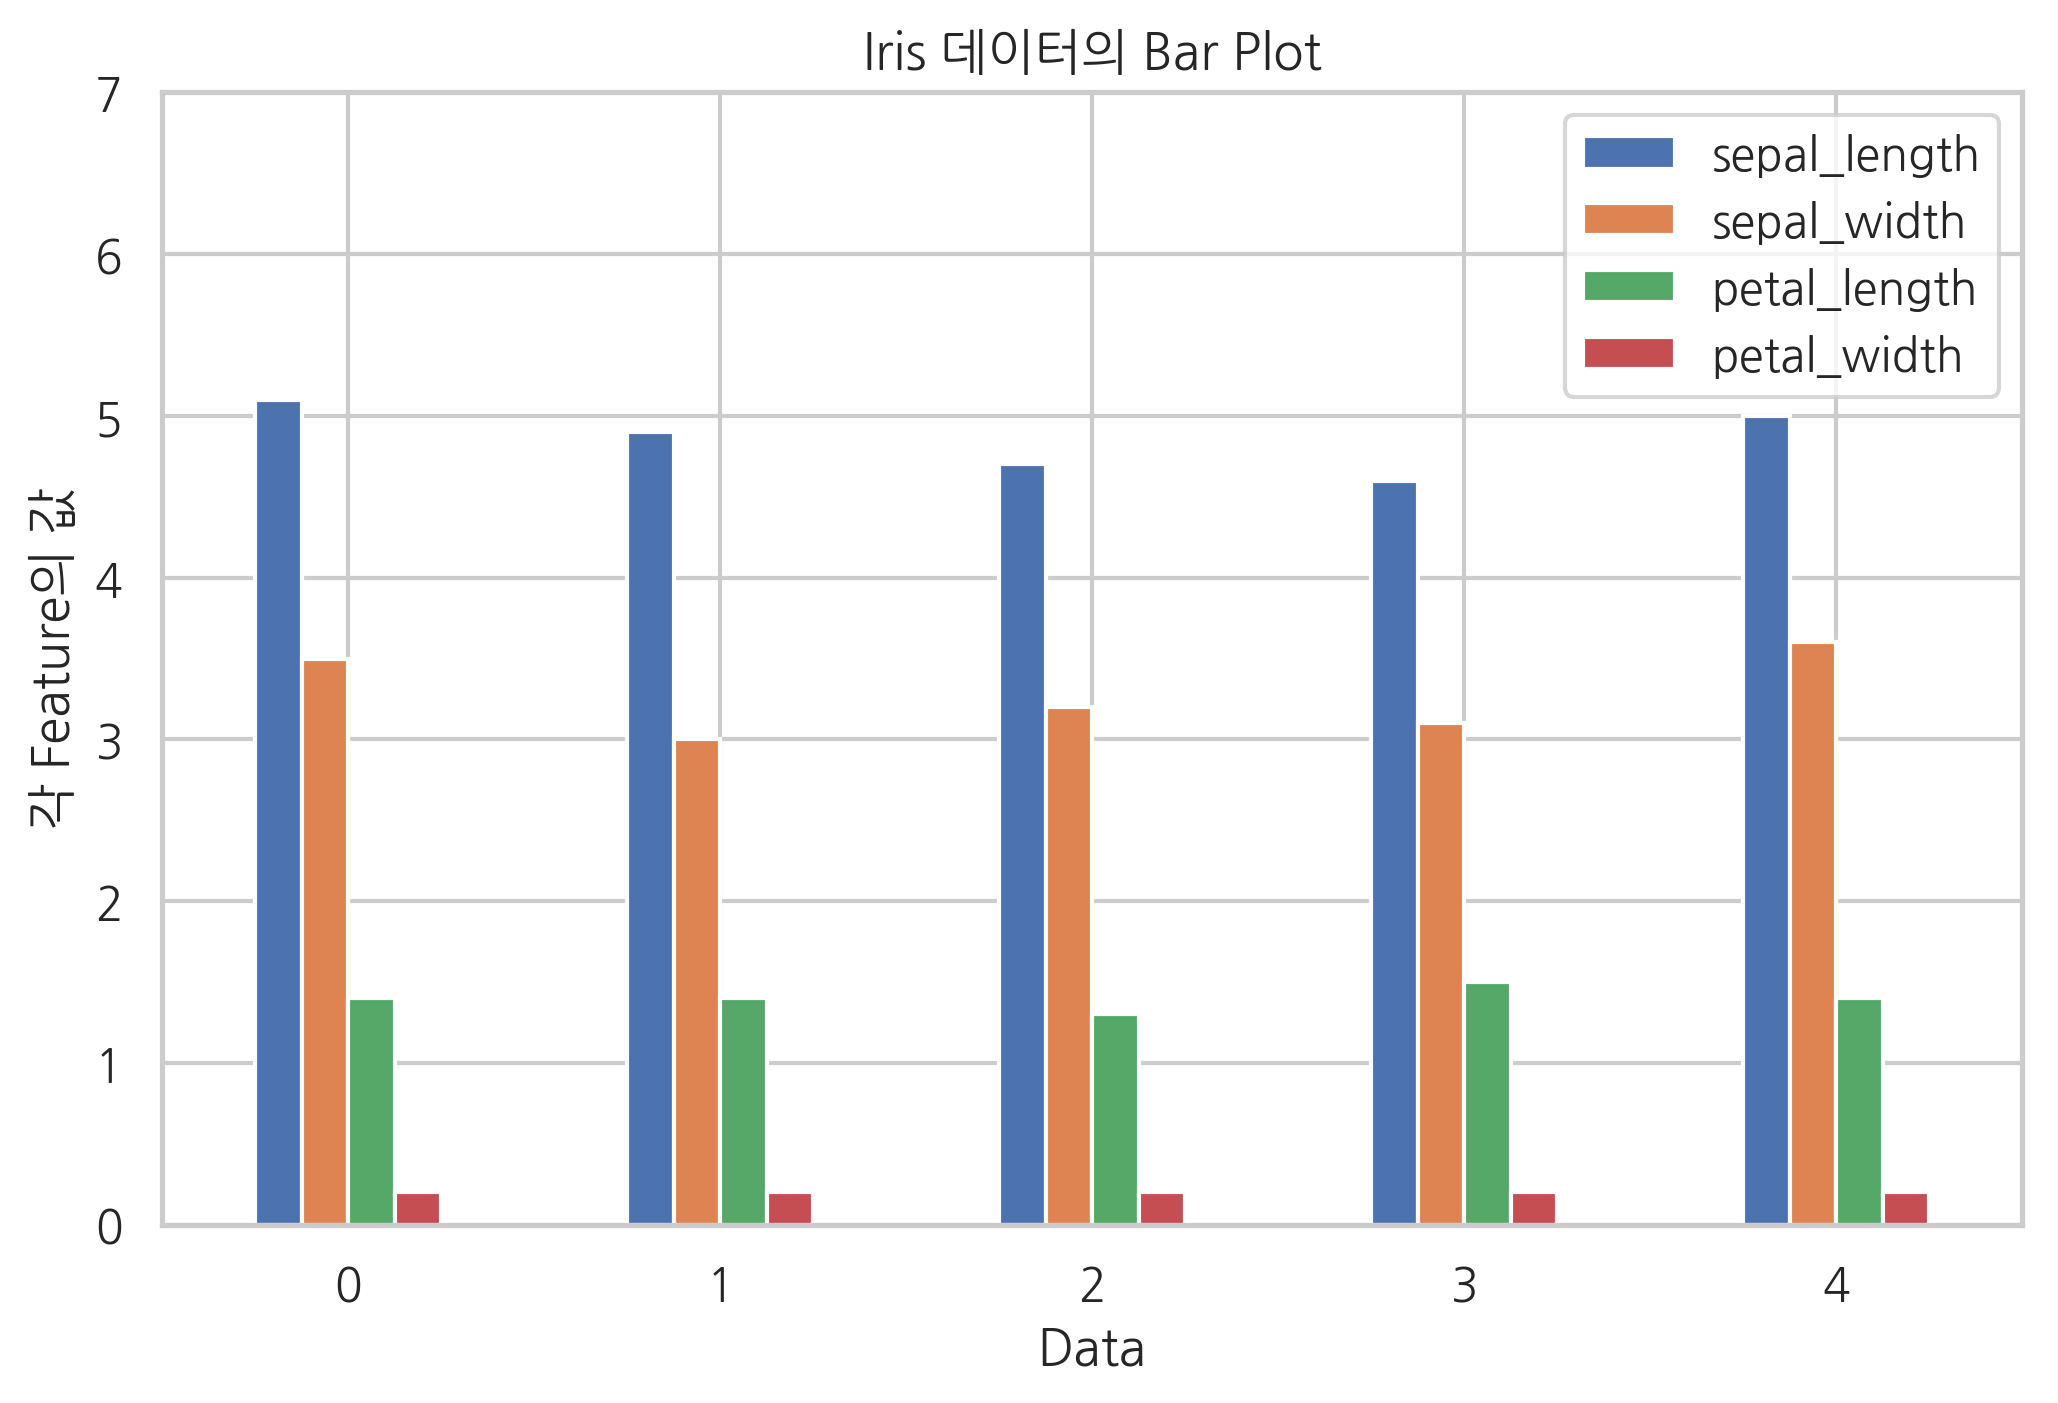

In [5]:
iris[:5].plot.bar(rot=0)
plt.title("Iris 데이터의 Bar Plot")
plt.xlabel("Data")
plt.ylabel("각 Feature의 값")
plt.ylim(0, 7)
plt.show()

그룹 분석 결과도 데이터프레임이므로 같은 방식으로 시각화할 수 있다.

In [6]:
df2 = iris.groupby(iris.species).mean()
df2.columns.name = "feature"
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


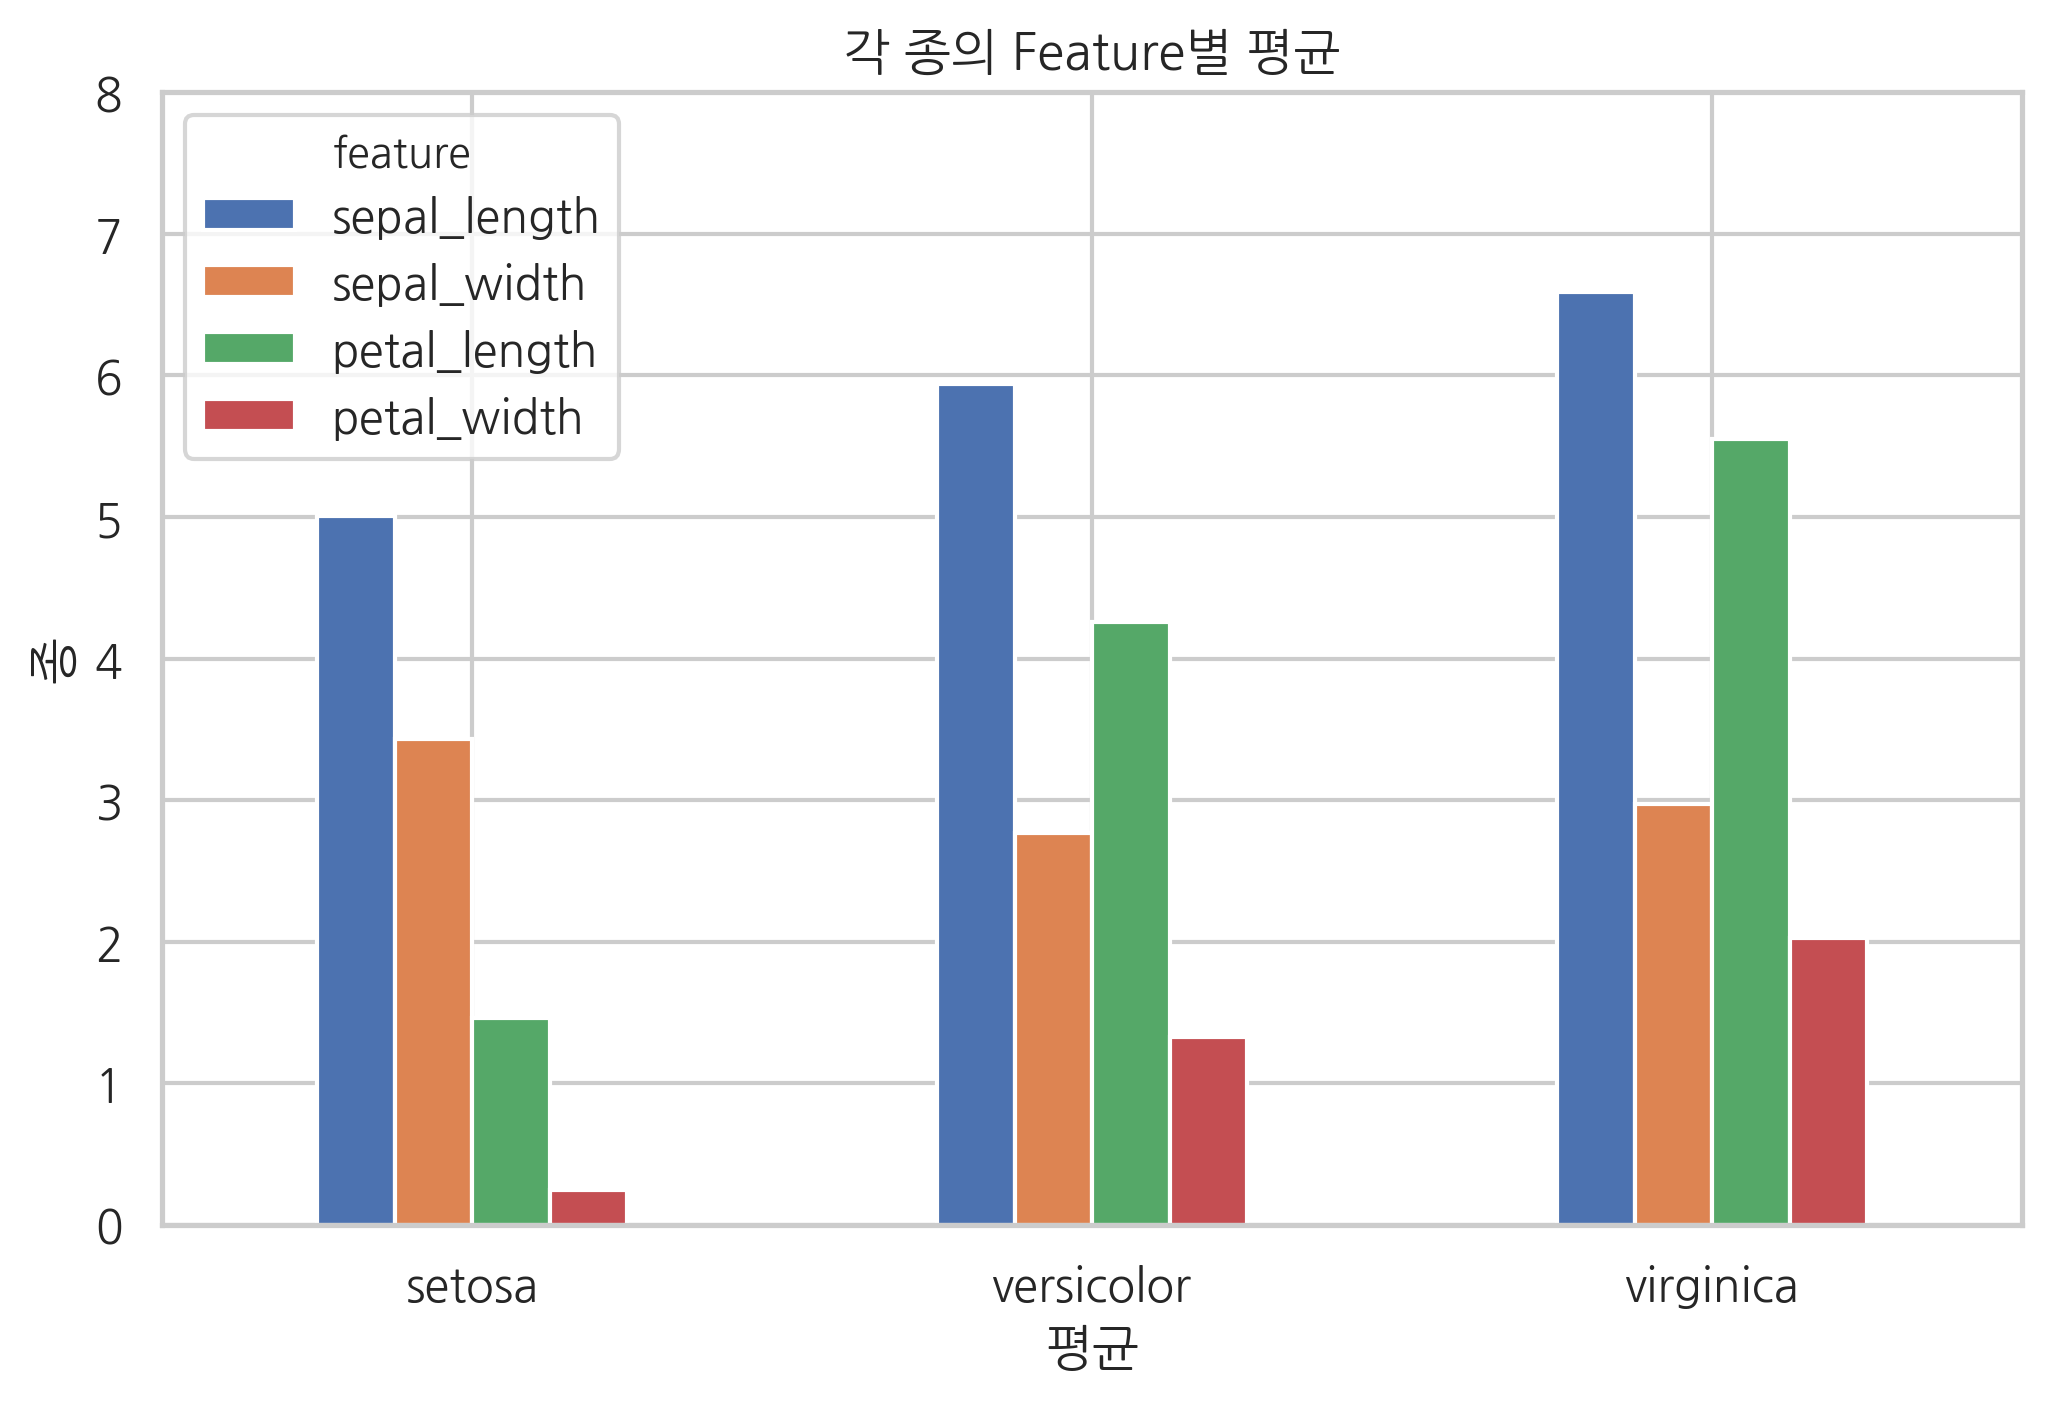

In [7]:
df2.plot.bar(rot=0)
plt.title("각 종의 Feature별 평균")
plt.xlabel("평균")
plt.ylabel("종")
plt.ylim(0, 8)
plt.show()

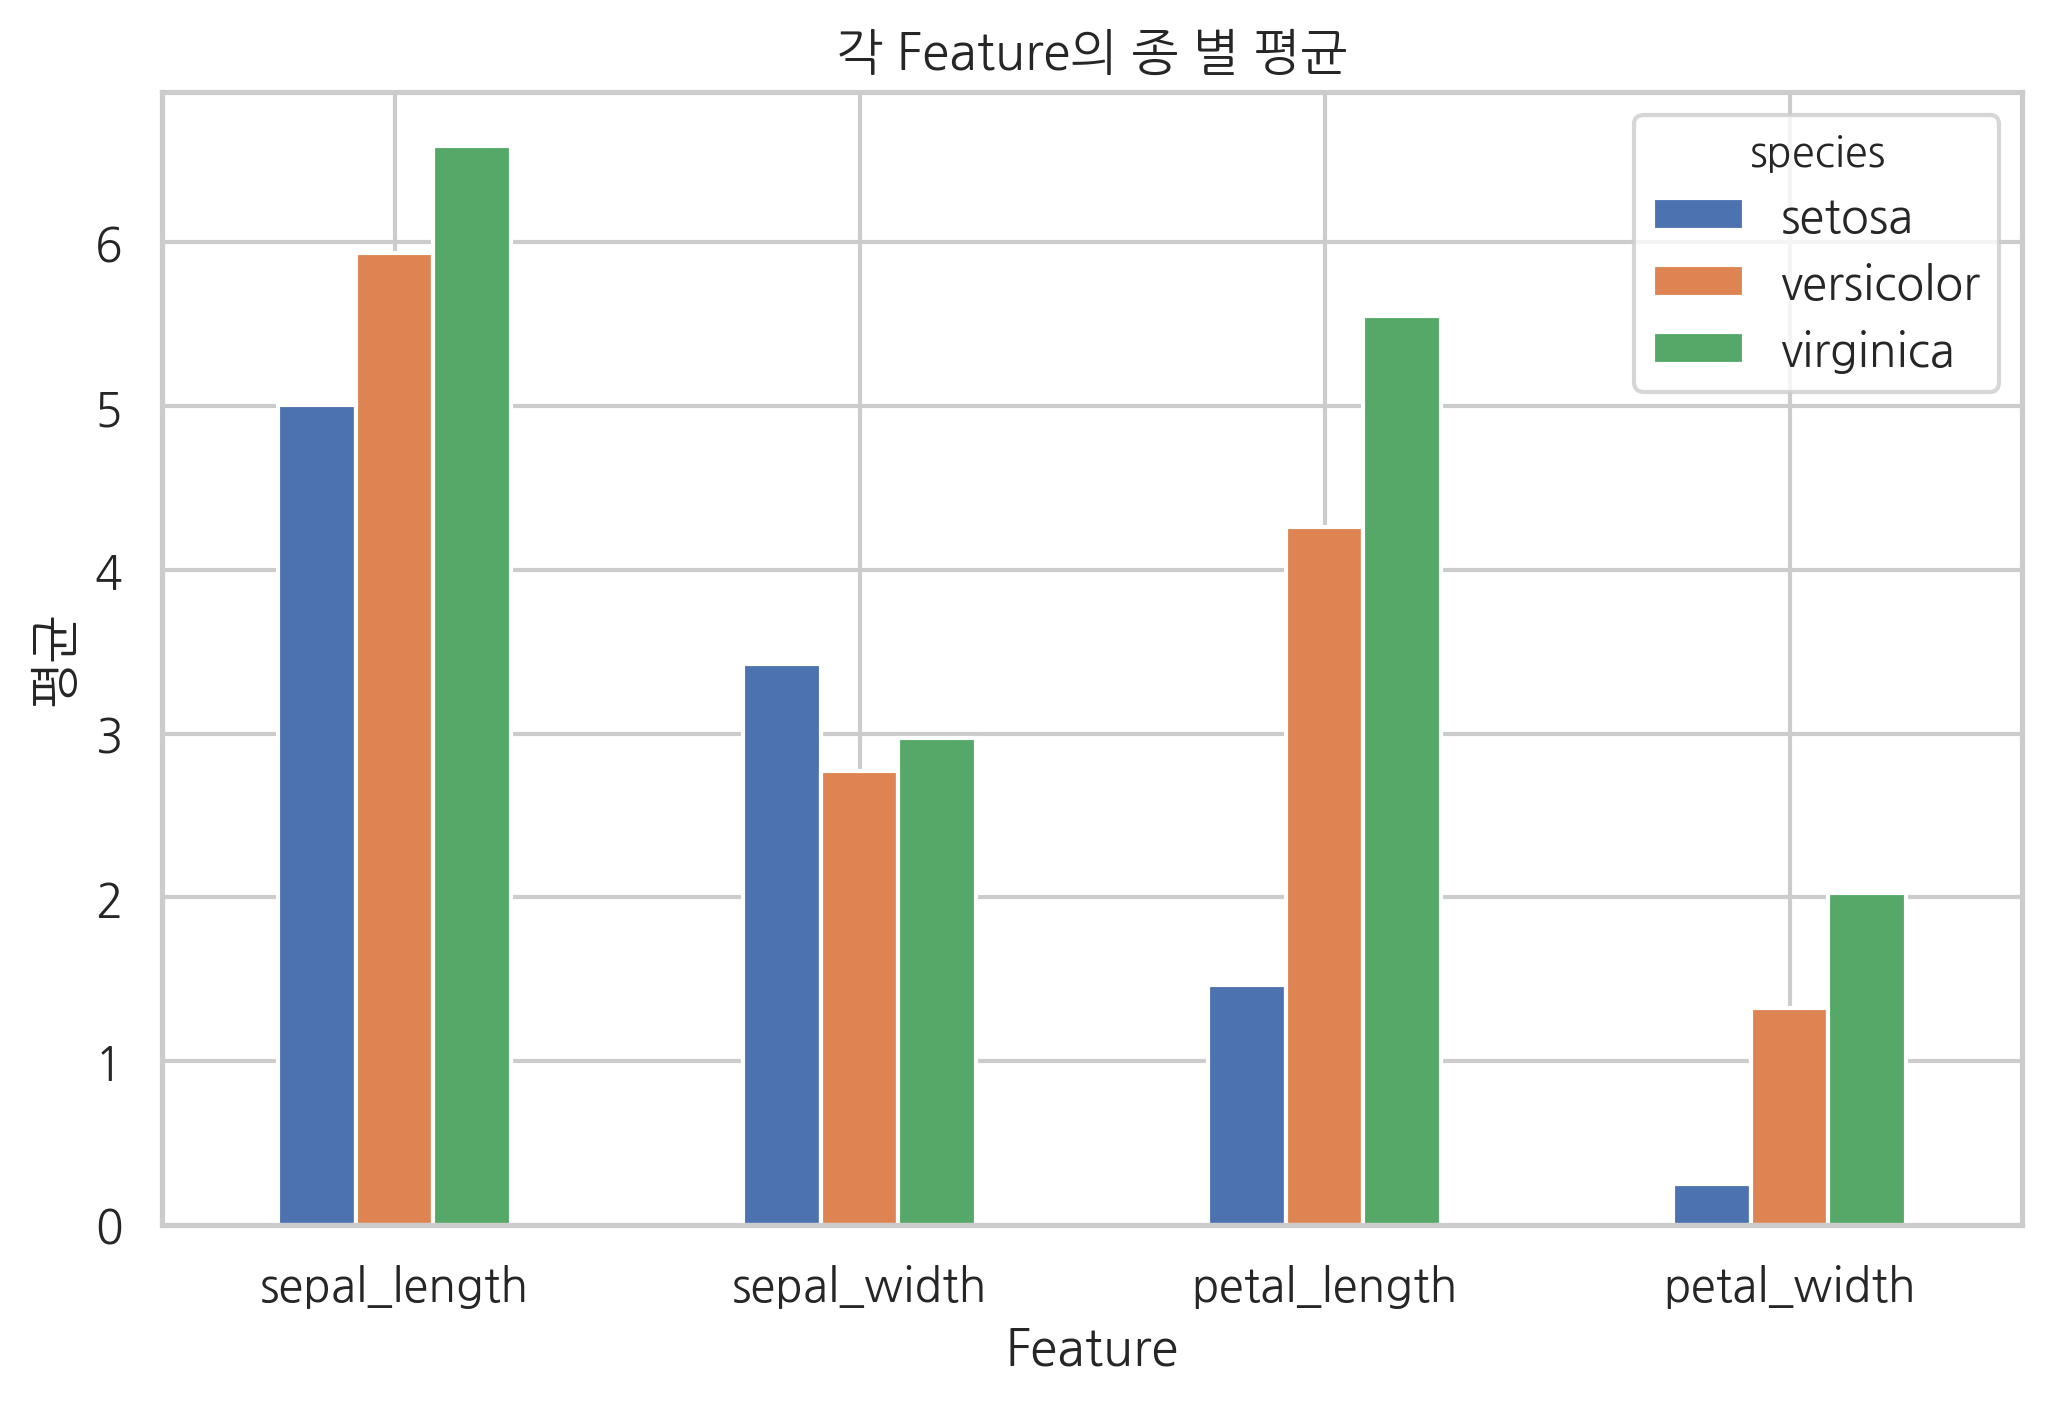

In [8]:
df2.T.plot.bar(rot=0)
plt.title("각 Feature의 종 별 평균")
plt.xlabel("Feature")
plt.ylabel("평균")
plt.show()

다음은 ``pie``,  ``hist``, ``kde``, ``box``, ``scatter`` 플롯 예제이다.

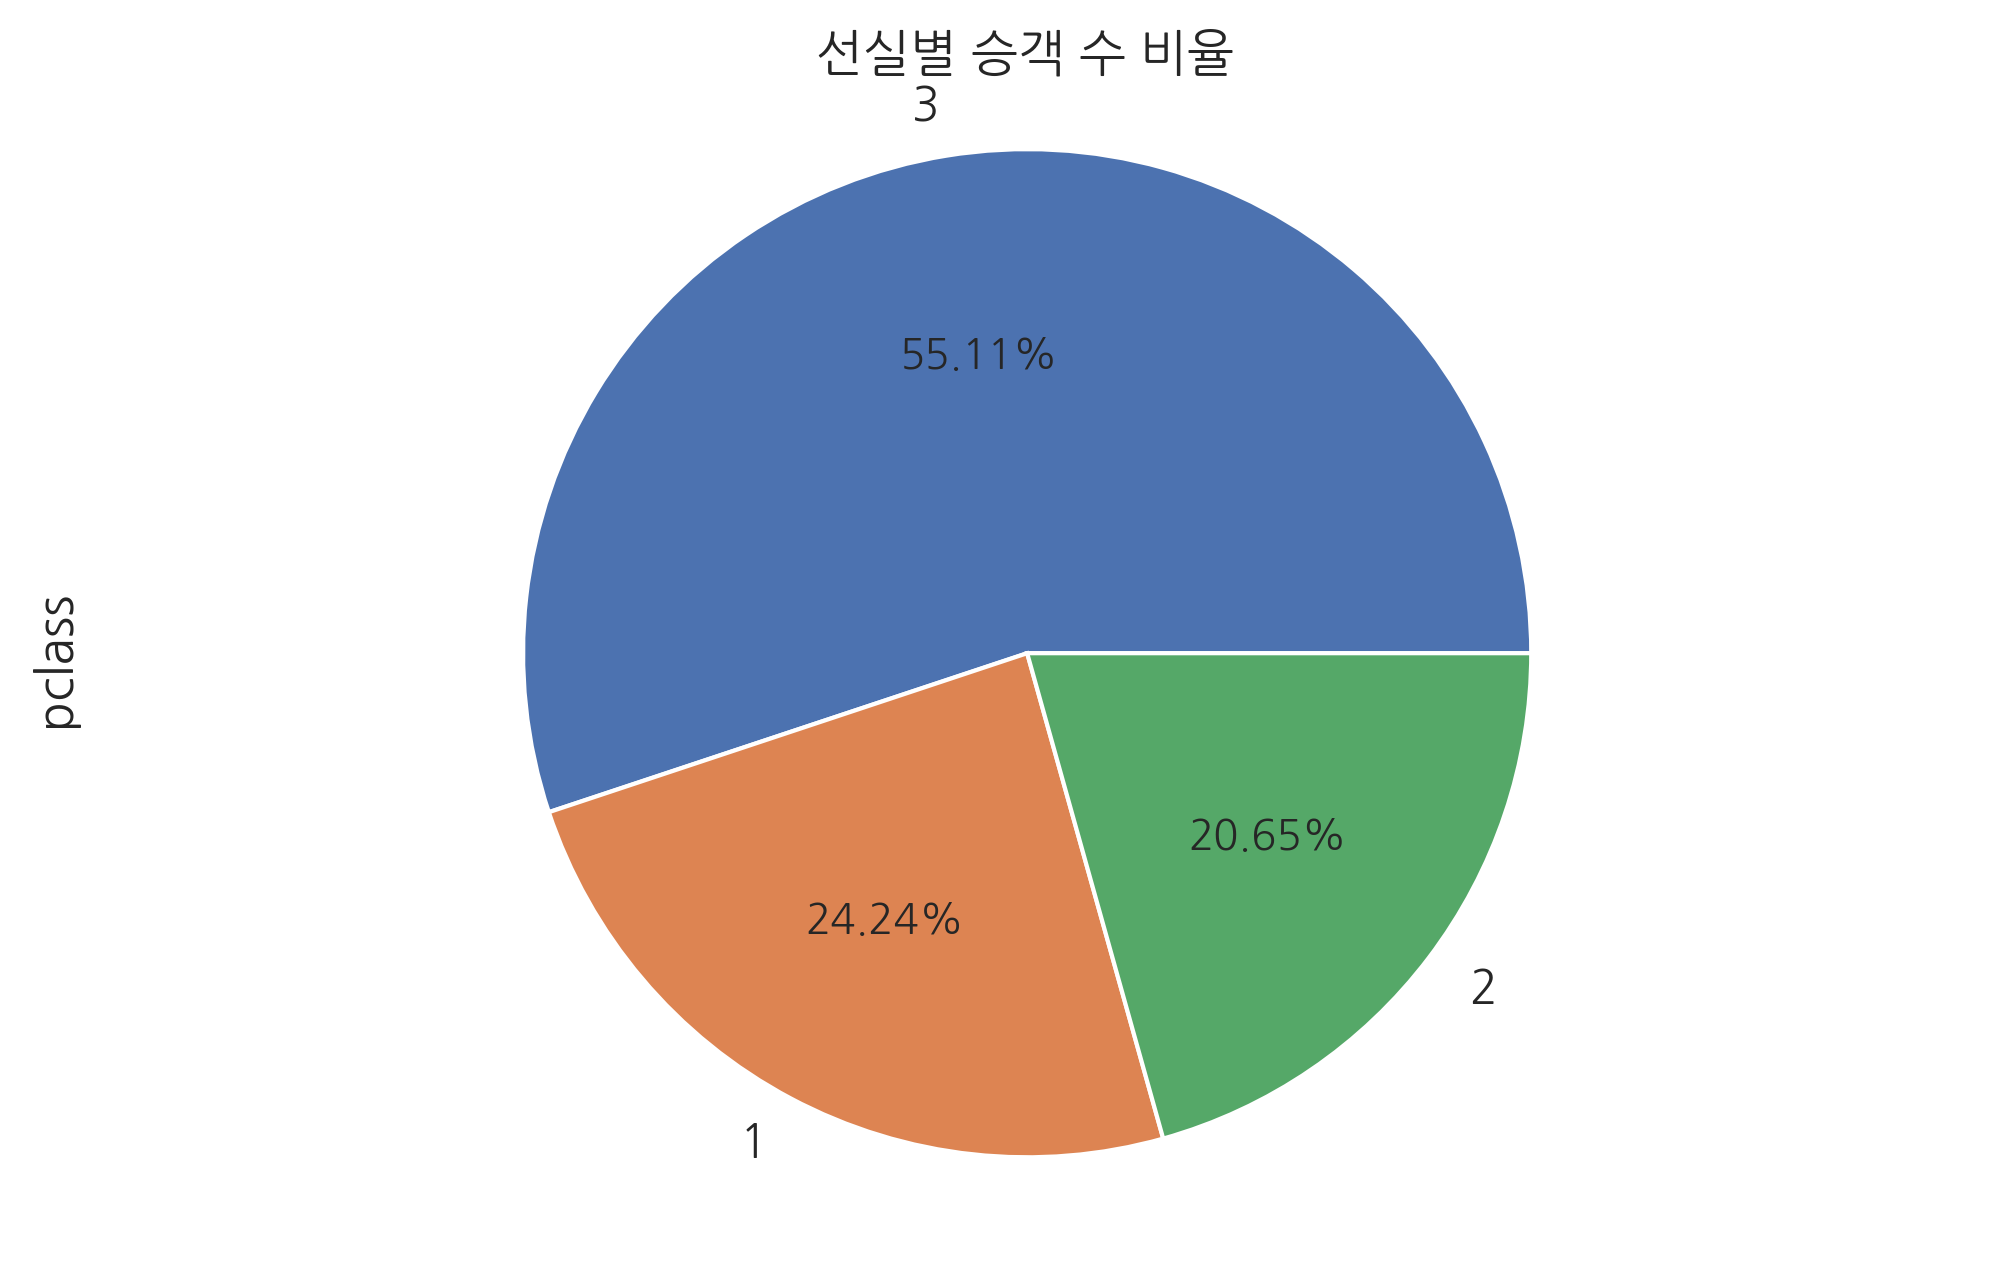

In [9]:
df3 = titanic.pclass.value_counts()
df3.plot.pie(autopct='%.2f%%')
plt.title("선실별 승객 수 비율")
plt.axis('equal')
plt.show()

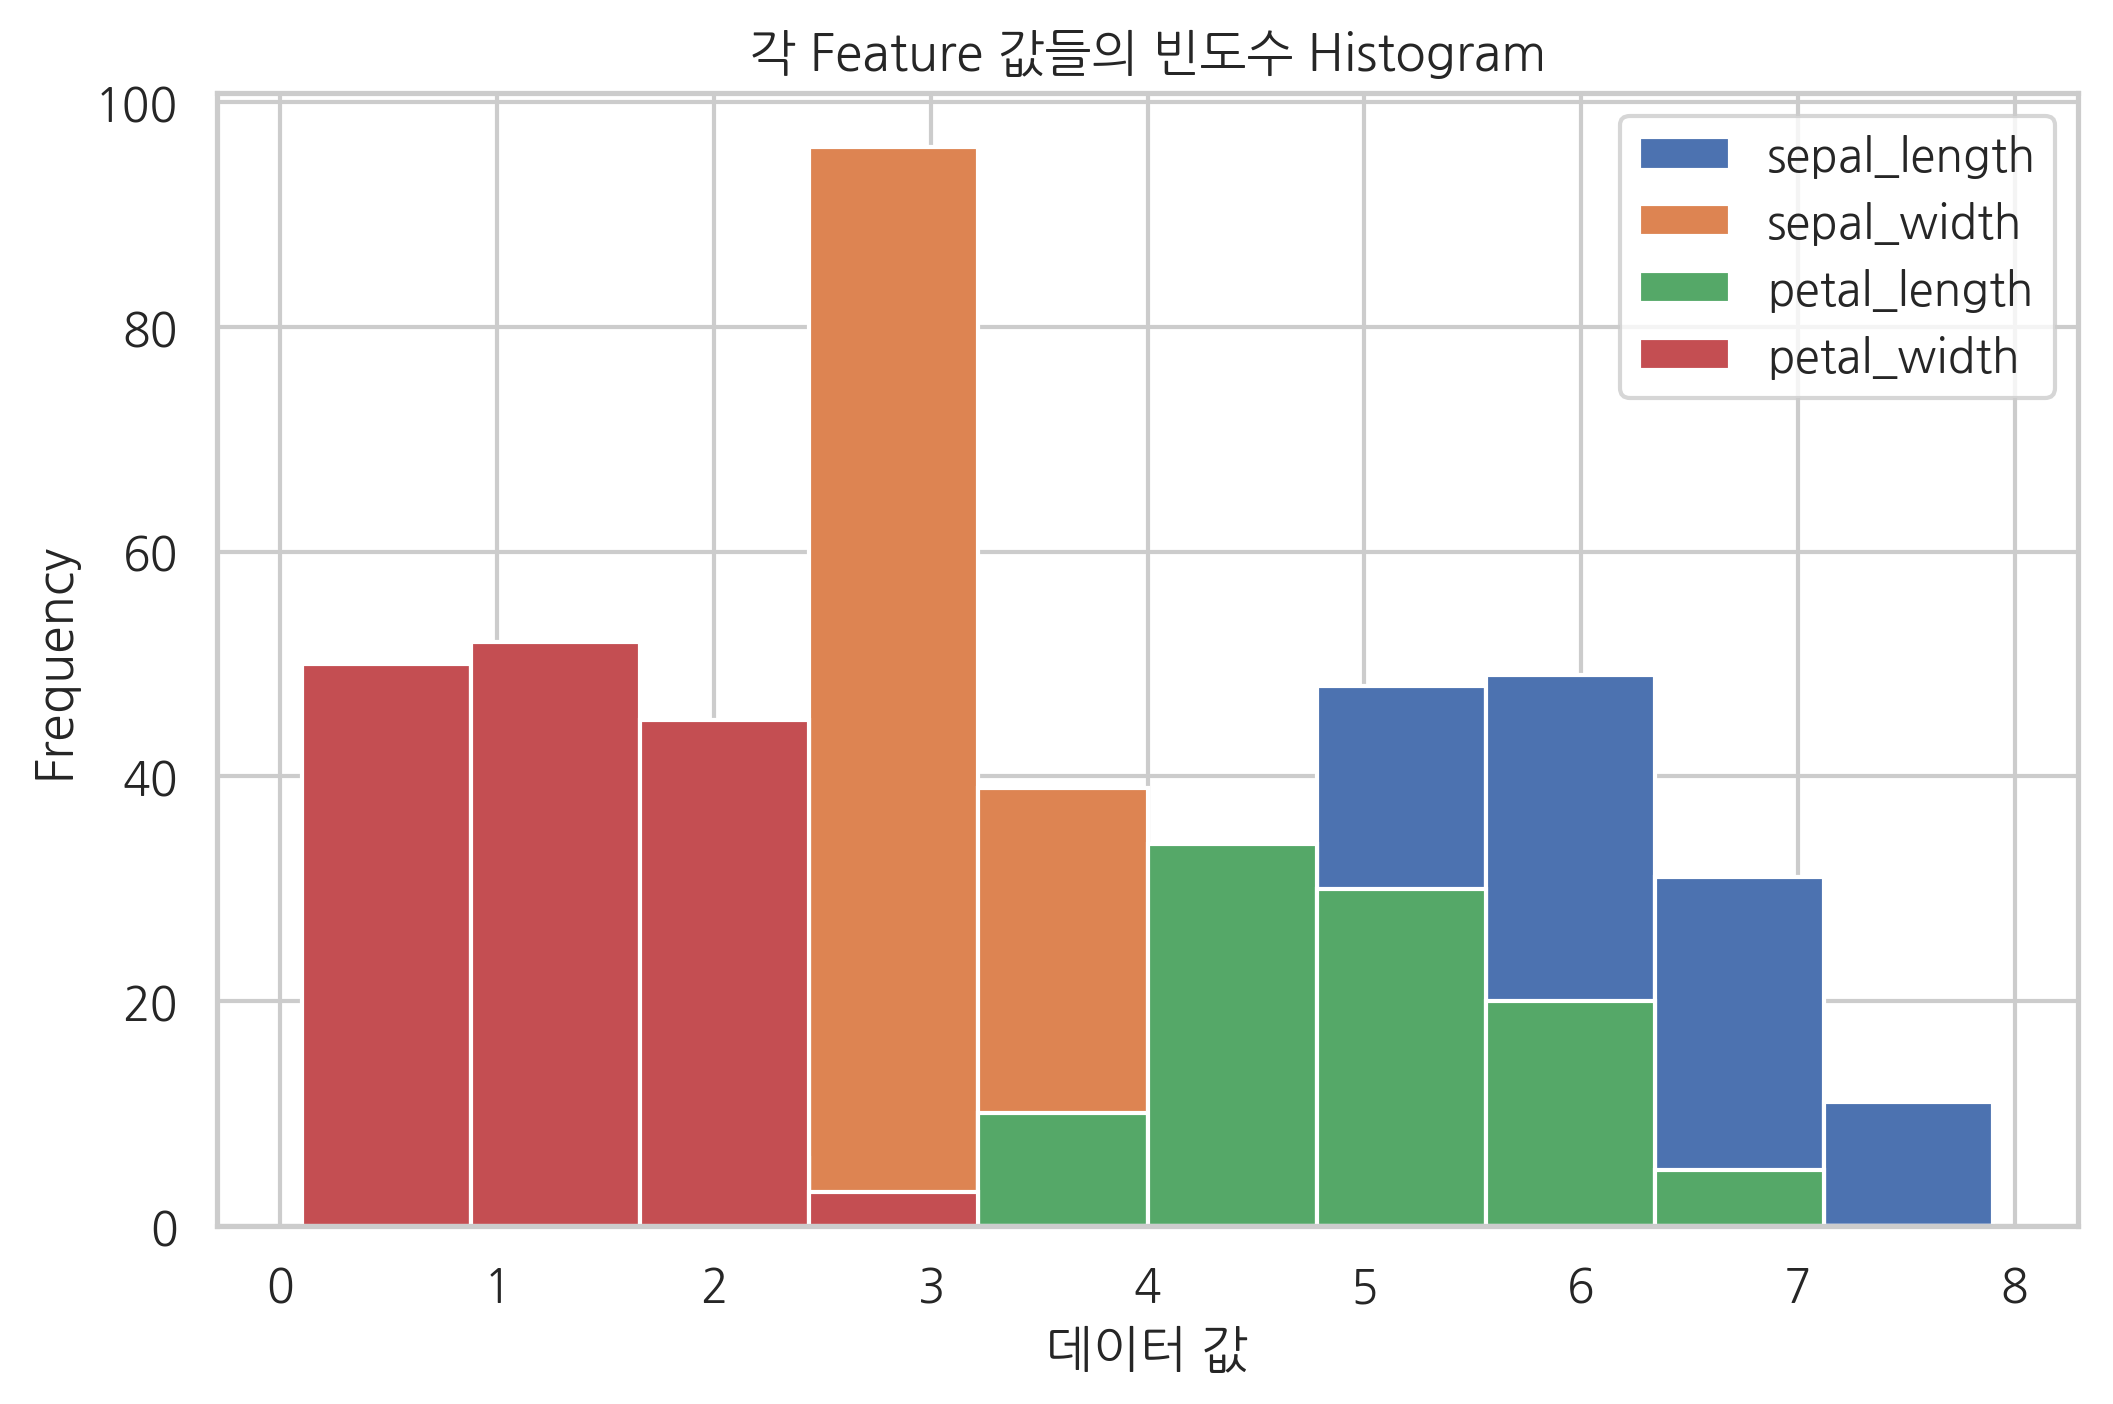

In [10]:
iris.plot.hist()
plt.title("각 Feature 값들의 빈도수 Histogram")
plt.xlabel("데이터 값")
plt.show()

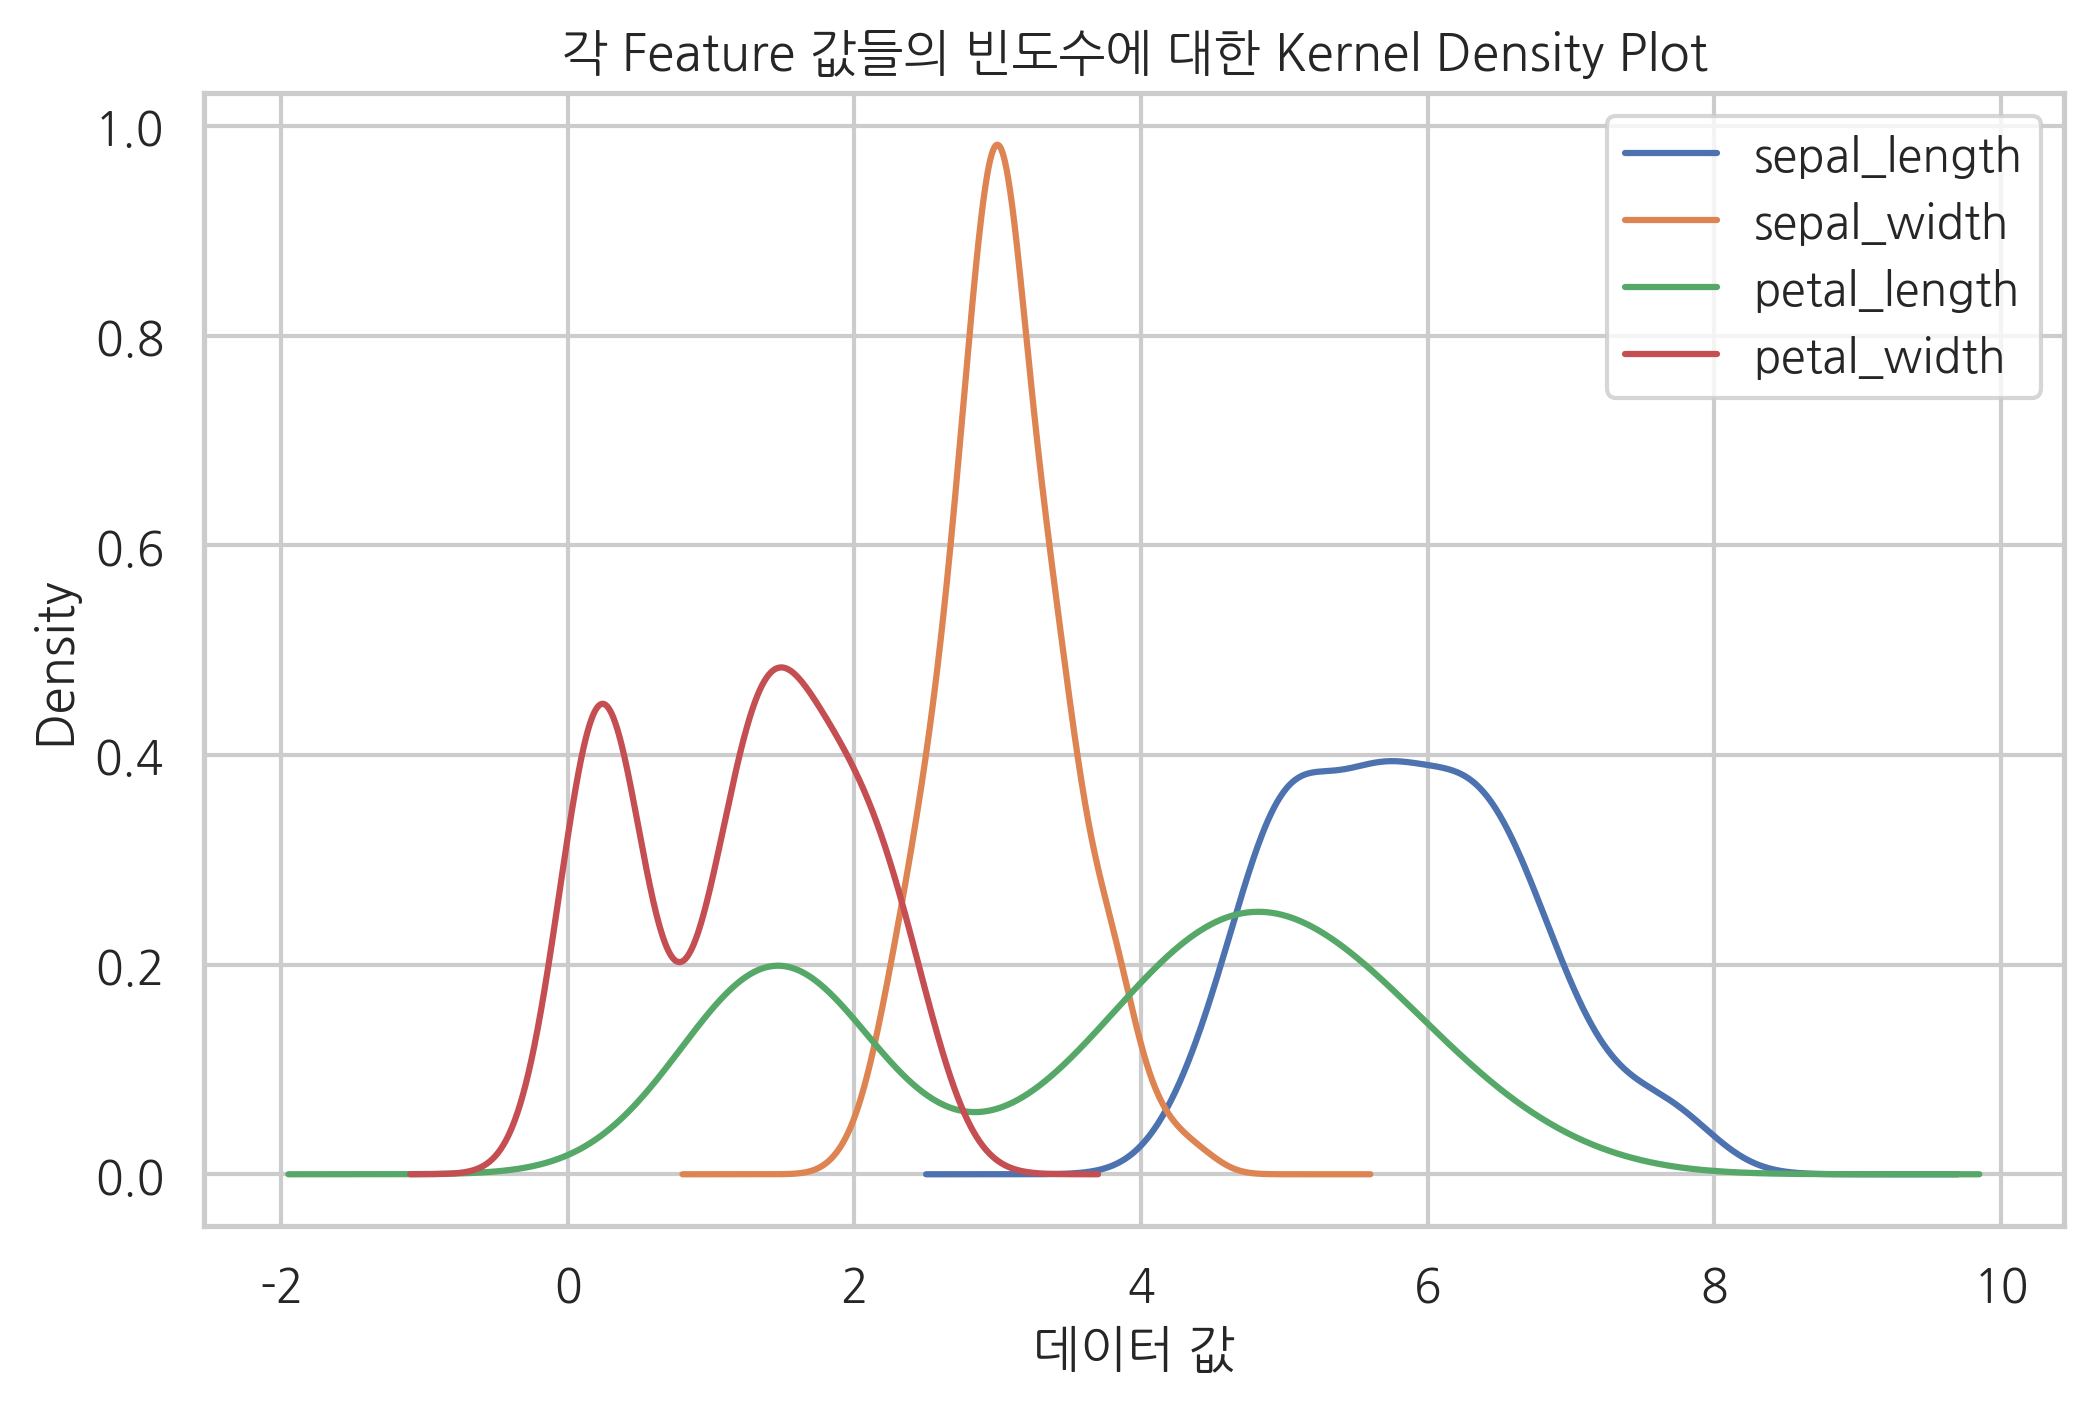

In [11]:
iris.plot.kde()
plt.title("각 Feature 값들의 빈도수에 대한 Kernel Density Plot")
plt.xlabel("데이터 값")
plt.show()

In [ ]:
iris.plot.box()
plt.title("각 Feature 값들의 빈도수에 대한 Box Plot")
plt.xlabel("Feature")
plt.ylabel("데이터 값")
plt.show()

박스플롯에 대해서는 추가적인 기능을 가진 `boxplot` 명령이 별도로 있다.

* `boxplot`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html

In [ ]:
iris.boxplot(by='species')
plt.tight_layout(pad=3, h_pad=1)
plt.title("각 Feature의 종 별 데이터에 대한 Box Plot")
plt.show()

In [ ]:
iris.plot.scatter(x='sepal_length', y='sepal_width')
plt.title("꽃받침의 길이와 너비에 대한 Scatter Plot")
plt.show()